In [ ]:
pip install keras-tuner

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=dff529c301e6b6fa2859bda953b94adfb36a546e0ee20a674598ac3690a84963
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=5a5e763cdbf172dafc0f106720f9246a5fefbc3accd0d3a1780e8dbc15779b57
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Pre-processing
x_train = x_train.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 100

In [ ]:
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 10)
(10000, 3072)
(10000, 10)


=> 50000 train samples, 10000 test samples. The images are all 32×32 in size and are colored.

In [ ]:
model = Sequential()
# input_shape
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 3,840,234
Trainable params: 3,840,234
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3097 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000

In [ ]:
H.history['accuracy'][-1]

0.09786000102758408

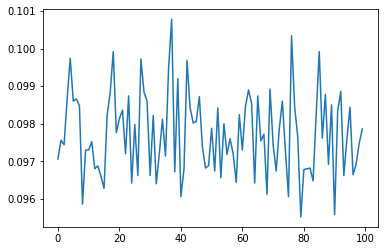

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'])
